In [1]:
import pandas as pd
import numpy as np 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score,classification_report
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB


In [2]:
column_names = [
        "intercolumnar distance",
        "upper margin", 
        "lower margin", 
        "exploitation", 
        "row number", 
        "modular ratio", 
        "interlinear spacing", 
        "weight", 
        "peak number", 
        "modular ratio/ interlinear spacing",
        "class"]

In [3]:
avila_ts_df=pd.read_csv("/Users/endors/Desktop/A4 2023/Python/Projet Pyt/avila/avila-ts.txt",header=None, names=column_names)
avila_tr_df=pd.read_csv("/Users/endors/Desktop/A4 2023/Python/Projet Pyt/avila/avila-tr.txt",header=None, names=column_names)
avila_ts_df

,intercolumnar distance,upper margin,lower margin,exploitation,row number,modular ratio,interlinear spacing,weight,peak number,modular ratio/ interlinear spacing,class
0,-3.498799,0.250492,0.232070,1.224178,-4.922215,1.145386,0.182426,-0.165983,-0.123005,1.087144,W
1,0.204355,-0.354049,0.320980,0.410166,-0.989576,-2.218127,0.220177,0.181844,2.090879,-2.009758,A
2,0.759828,-1.304042,-0.023991,-0.973663,-0.006417,-0.349509,-0.421580,-0.450127,0.469443,0.060952,I
3,-0.005490,0.360409,0.281860,-0.213479,-1.168333,-1.013906,-0.346080,1.176165,0.968347,-0.627999,E
4,0.080916,0.101320,0.104040,0.140490,0.261718,0.480988,0.710932,-0.253430,-0.497183,0.155681,A
...,...,...,...,...,...,...,...,...,...,...,...
10432,-0.128929,-0.040001,0.057807,0.557894,0.261718,-0.930856,-0.044076,1.158458,2.277968,-0.699884,X
10433,0.266074,0.556689,-0.020434,0.176624,0.261718,-0.515608,0.597681,0.178349,0.625350,-0.657245,G
10434,-0.054866,0.580242,0.032912,-0.016668,0.261718,1.519109,0.371178,-0.985508,-0.403638,1.276301,A
10435,0.080916,0.588093,0.015130,0.002250,0.261718,-0.930856,-0.270579,0.163807,-0.091823,-0.593329,F


In [4]:
avila = pd.concat([avila_ts_df, avila_tr_df], axis=0,ignore_index=True)
avila

,intercolumnar distance,upper margin,lower margin,exploitation,row number,modular ratio,interlinear spacing,weight,peak number,modular ratio/ interlinear spacing,class
0,-3.498799,0.250492,0.232070,1.224178,-4.922215,1.145386,0.182426,-0.165983,-0.123005,1.087144,W
1,0.204355,-0.354049,0.320980,0.410166,-0.989576,-2.218127,0.220177,0.181844,2.090879,-2.009758,A
2,0.759828,-1.304042,-0.023991,-0.973663,-0.006417,-0.349509,-0.421580,-0.450127,0.469443,0.060952,I
3,-0.005490,0.360409,0.281860,-0.213479,-1.168333,-1.013906,-0.346080,1.176165,0.968347,-0.627999,E
4,0.080916,0.101320,0.104040,0.140490,0.261718,0.480988,0.710932,-0.253430,-0.497183,0.155681,A
...,...,...,...,...,...,...,...,...,...,...,...
20862,0.080916,0.588093,0.015130,0.002250,0.261718,-0.557133,0.371178,0.932346,0.282354,-0.580141,F
20863,0.253730,-0.338346,0.352988,-1.154243,0.172340,-0.557133,0.257927,0.348428,0.032902,-0.527134,F
20864,0.229043,-0.000745,0.171611,-0.002793,0.261718,0.688613,0.295677,-1.088486,-0.590727,0.580142,A
20865,-0.301743,0.352558,0.288973,1.638181,0.261718,0.688613,0.069175,0.502761,0.625350,0.718969,E


In [5]:
Y=avila["class"]
Y

0        W
1        A
2        I
3        E
4        A
        ..
20862    F
20863    F
20864    A
20865    E
20866    X
Name: class, Length: 20867, dtype: object

In [6]:
X = avila.drop('class', axis=1)
X

,intercolumnar distance,upper margin,lower margin,exploitation,row number,modular ratio,interlinear spacing,weight,peak number,modular ratio/ interlinear spacing
0,-3.498799,0.250492,0.232070,1.224178,-4.922215,1.145386,0.182426,-0.165983,-0.123005,1.087144
1,0.204355,-0.354049,0.320980,0.410166,-0.989576,-2.218127,0.220177,0.181844,2.090879,-2.009758
2,0.759828,-1.304042,-0.023991,-0.973663,-0.006417,-0.349509,-0.421580,-0.450127,0.469443,0.060952
3,-0.005490,0.360409,0.281860,-0.213479,-1.168333,-1.013906,-0.346080,1.176165,0.968347,-0.627999
4,0.080916,0.101320,0.104040,0.140490,0.261718,0.480988,0.710932,-0.253430,-0.497183,0.155681
...,...,...,...,...,...,...,...,...,...,...
20862,0.080916,0.588093,0.015130,0.002250,0.261718,-0.557133,0.371178,0.932346,0.282354,-0.580141
20863,0.253730,-0.338346,0.352988,-1.154243,0.172340,-0.557133,0.257927,0.348428,0.032902,-0.527134
20864,0.229043,-0.000745,0.171611,-0.002793,0.261718,0.688613,0.295677,-1.088486,-0.590727,0.580142
20865,-0.301743,0.352558,0.288973,1.638181,0.261718,0.688613,0.069175,0.502761,0.625350,0.718969


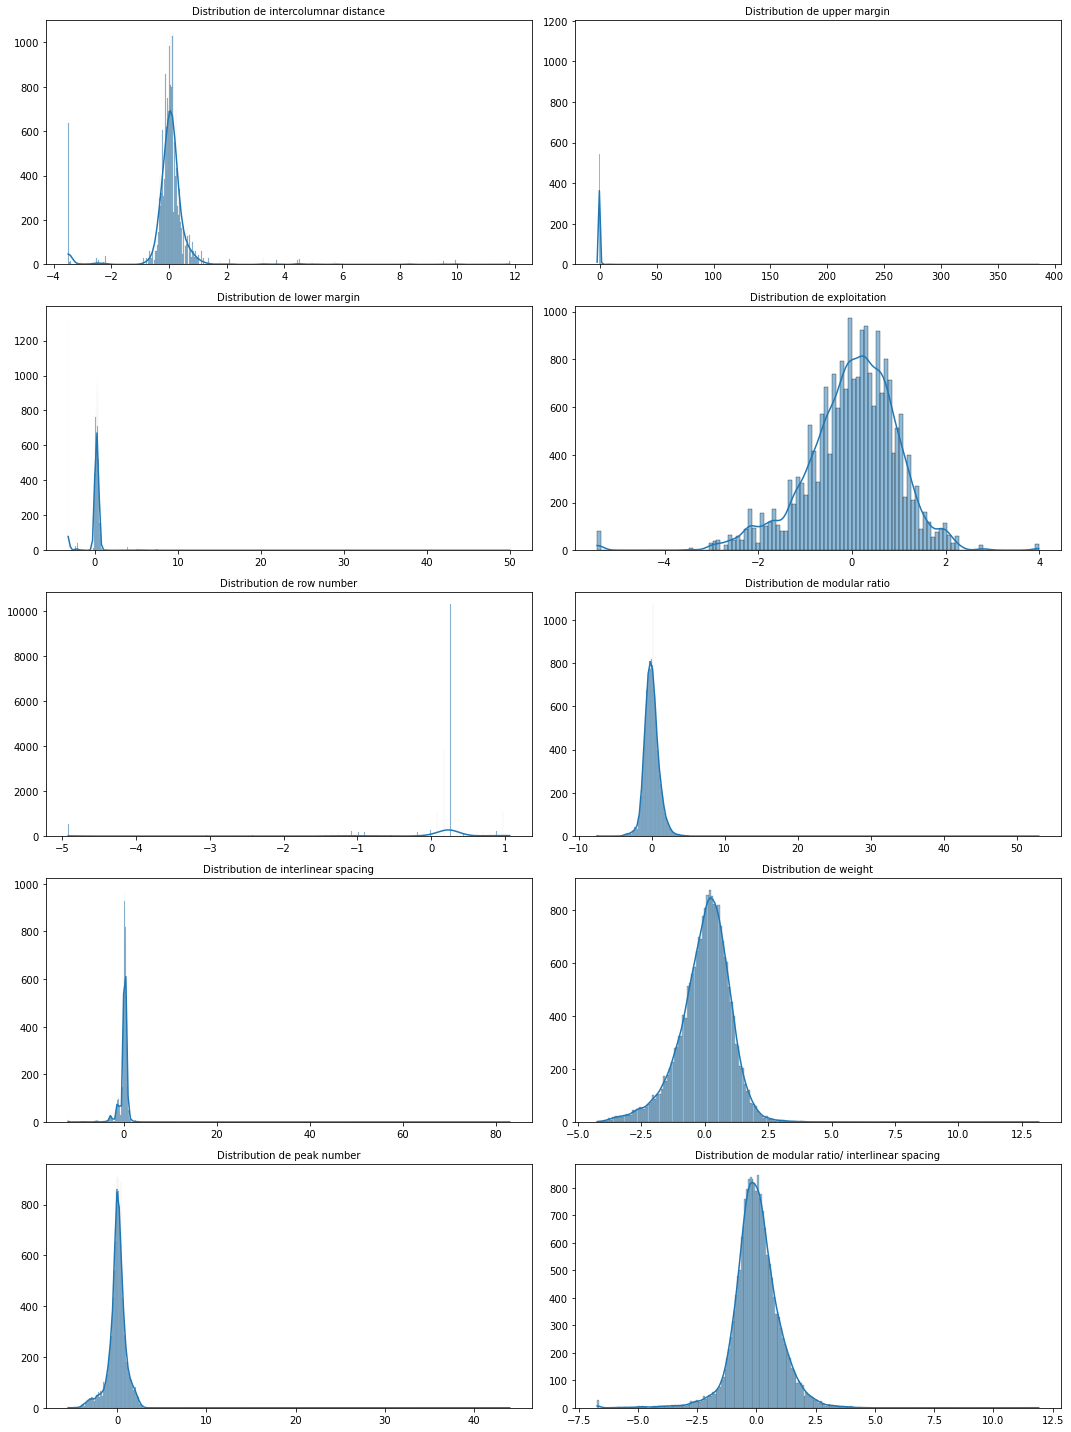

In [7]:
import seaborn as sns

# Visualisation de la distribution des caractéristiques numériques de l'ensemble d'entraînement

# Création d'une grille de graphiques pour les histogrammes des caractéristiques numériques
fig, axes = plt.subplots(5, 2, figsize=(15, 20))

# Aplatir l'array des axes pour un itérable facile
axes = axes.flatten()

# Boucle sur les caractéristiques numériques et création d'un histogramme pour chacune
for i, col in enumerate(X):
    sns.histplot(X[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution de {col}', fontsize=10)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# Ajustement de la mise en page pour éviter le chevauchement
plt.tight_layout()

# Affichage des graphiques
plt.show()


potentiellement ic binomial
sinon plutot des lois normales
row number presque une seule valeur + plusieurs valeur très différente quelle pertinence  ? 

correlation entre colonnes et class finale

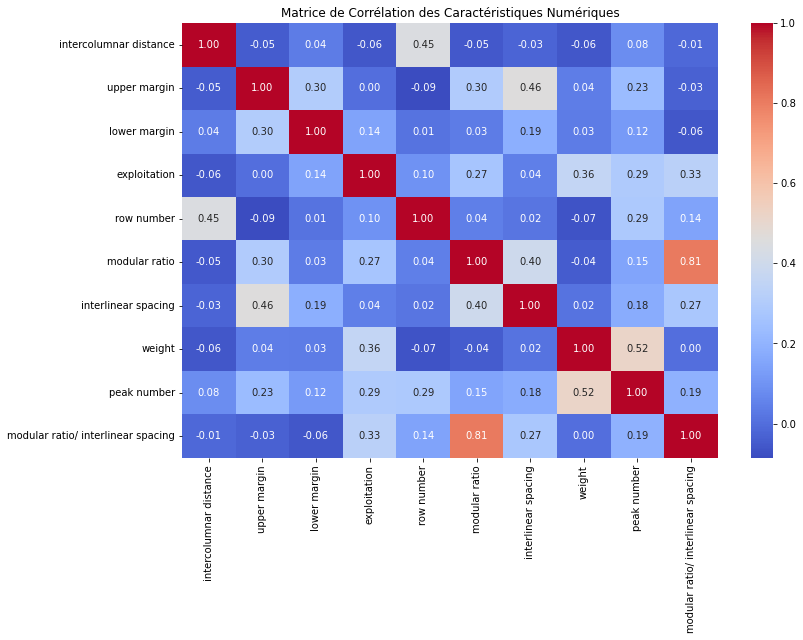

In [8]:
# Calcul de la matrice de corrélation pour l'ensemble d'entraînement
correlation_matrix_train = X.corr()

# Création d'une figure pour la heatmap de la matrice de corrélation
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_train, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matrice de Corrélation des Caractéristiques Numériques')
plt.show()



assez peu de correlation

In [9]:
X = X.drop('modular ratio/ interlinear spacing', axis=1)
X = X.drop('row number', axis=1)

In [10]:
"""x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33,random_state=42)

x_train.shape"""

(13980, 8)

52% Très mauvais score 


In [11]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

# Liste des modèles à évaluer
models = [
    ('Logistic Regression', LogisticRegression(max_iter=10000, solver='saga', tol=1e-3)),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Naive Bayes', GaussianNB()),
    ('KNN', KNeighborsClassifier())
]

# Définition des métriques
scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']

# Évaluation des modèles
results = {}
for name, model in models:
    cv_results = cross_validate(model, X, Y, cv=5, scoring=scoring, return_train_score=False)
    results[name] = cv_results
   





/Users/endors/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/endors/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/endors/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/endors/opt/anaconda3/lib/python3.9/site-packages

In [12]:
# Parcours des résultats pour chaque modèle
for name in results:
    print(f"Résultats pour {name}:")
    # Temps moyen d'ajustement et de score
    print(f"  Temps moyen d'ajustement: {results[name]['fit_time'].mean():.3f} secondes")
    print(f"  Temps moyen de scoring: {results[name]['score_time'].mean():.3f} secondes")
    # Performances sur les différents metrics
    print(f"  Accuracy moyenne: {results[name]['test_accuracy'].mean():.4f} (Écart-type = {results[name]['test_accuracy'].std():.4f})")
    print(f"  Precision moyenne: {results[name]['test_precision_macro'].mean():.4f} (Écart-type = {results[name]['test_precision_macro'].std():.4f})")
    print(f"  Recall moyenne: {results[name]['test_recall_macro'].mean():.4f} (Écart-type = {results[name]['test_recall_macro'].std():.4f})")
    print(f"  F1-Score moyen: {results[name]['test_f1_macro'].mean():.4f} (Écart-type = {results[name]['test_f1_macro'].std():.4f})")
    print("\n")


Résultats pour Logistic Regression:
  Temps moyen d'ajustement: 3.588 secondes
  Temps moyen de scoring: 0.063 secondes
  Accuracy moyenne: 0.5197 (Écart-type = 0.0072)
  Precision moyenne: 0.3128 (Écart-type = 0.0414)
  Recall moyenne: 0.2650 (Écart-type = 0.0482)
  F1-Score moyen: 0.2565 (Écart-type = 0.0438)


Résultats pour Decision Tree:
  Temps moyen d'ajustement: 0.096 secondes
  Temps moyen de scoring: 0.063 secondes
  Accuracy moyenne: 0.9713 (Écart-type = 0.0065)
  Precision moyenne: 0.9524 (Écart-type = 0.0245)
  Recall moyenne: 0.9436 (Écart-type = 0.0261)
  F1-Score moyen: 0.9429 (Écart-type = 0.0182)


Résultats pour Random Forest:
  Temps moyen d'ajustement: 2.049 secondes
  Temps moyen de scoring: 0.138 secondes
  Accuracy moyenne: 0.9875 (Écart-type = 0.0020)
  Precision moyenne: 0.9910 (Écart-type = 0.0014)
  Recall moyenne: 0.9736 (Écart-type = 0.0159)
  F1-Score moyen: 0.9808 (Écart-type = 0.0105)


Résultats pour Naive Bayes:
  Temps moyen d'ajustement: 0.022 secon

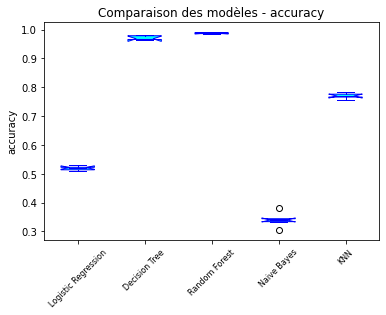

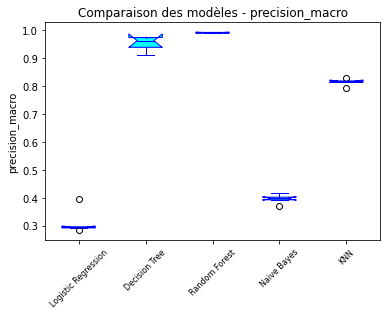

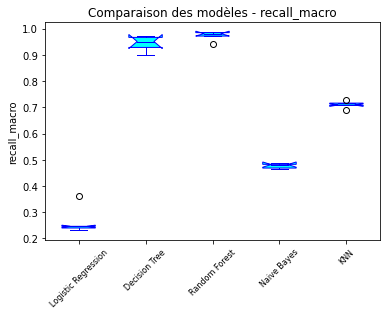

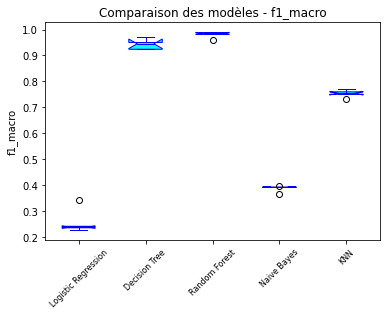

In [13]:
import matplotlib.pyplot as plt

# Fonction pour dessiner les graphiques
def draw_plot(data, edge_color, fill_color):
    bp = ax.boxplot(data, patch_artist=True, notch=True)
    for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
        plt.setp(bp[element], color=edge_color)
    for patch in bp['boxes']:
        patch.set(facecolor=fill_color)

# Créer des graphiques pour chaque métrique
for metric in scoring:
    fig, ax = plt.subplots()
    data = [results[name][f'test_{metric}'] for name in results]
    draw_plot(data, 'blue', 'cyan')
    ax.set_title(f'Comparaison des modèles - {metric}')
    ax.set_xticklabels(results.keys(), rotation=45, fontsize=8)
    ax.set_ylabel(metric)
    plt.show()


les modeles type arbre sont très efficaces mais ils ne semblent pas être surentrainés 

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report




# Création et entraînement du modèle de régression logistique
# On utilise ici une régularisation L2 (Ridge) par défaut avec le paramètre 'C' défini à 1.0
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(x_train, y_train)

# Prédiction sur l'ensemble de validation
y_pred = logistic_model.predict(x_test)

# Évaluation de la précision
accuracy = accuracy_score(y_test, y_pred)
print(f'Précision sur l\'ensemble de validation : {accuracy:.4f}')

# Rapport de classification
print("\nRapport de classification :\n", classification_report(y_test, y_pred))


Précision sur l'ensemble de validation : 0.5256

Rapport de classification :
               precision    recall  f1-score   support

           A       0.50      0.94      0.65      2802
           B       1.00      0.50      0.67         2
           C       0.00      0.00      0.00        78
           D       0.00      0.00      0.00       237
           E       0.46      0.24      0.31       703
           F       0.17      0.02      0.03      1304
           G       0.00      0.00      0.00       304
           H       0.48      0.16      0.24       357
           I       0.76      0.82      0.79       538
           W       0.22      0.07      0.11        28
           X       0.76      0.73      0.75       335
           Y       0.72      0.32      0.44       199

    accuracy                           0.53      6887
   macro avg       0.42      0.32      0.33      6887
weighted avg       0.42      0.53      0.43      6887



/Users/endors/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/endors/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/endors/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [15]:
logistic_model = LogisticRegression(
    C=0.5,             # Réglage de la force de régularisation
    solver='lbfgs',    # Choix du solveur
    max_iter=1000,     # Augmentation du nombre maximum d'itérations
    penalty='l2',      # Utilisation de la régularisation L2 (Ridge)
    tol=1e-4           # Réglage du seuil de tolérance
)
logistic_model.fit(x_train, y_train)
# Prédiction sur l'ensemble de validation
y_pred = logistic_model.predict(x_test)

# Évaluation de la précision
accuracy = accuracy_score(y_test, y_pred)
print(f'Précision sur l\'ensemble de validation : {accuracy:.4f}')

# Rapport de classification
print("\nRapport de classification :\n", classification_report(y_test, y_pred))

Précision sur l'ensemble de validation : 0.5248

Rapport de classification :
               precision    recall  f1-score   support

           A       0.50      0.94      0.65      2802
           B       1.00      0.50      0.67         2
           C       0.00      0.00      0.00        78
           D       0.00      0.00      0.00       237
           E       0.46      0.23      0.31       703
           F       0.17      0.02      0.03      1304
           G       0.00      0.00      0.00       304
           H       0.47      0.15      0.23       357
           I       0.75      0.81      0.78       538
           W       0.14      0.04      0.06        28
           X       0.76      0.73      0.74       335
           Y       0.71      0.30      0.42       199

    accuracy                           0.52      6887
   macro avg       0.41      0.31      0.32      6887
weighted avg       0.42      0.52      0.42      6887



/Users/endors/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/endors/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/endors/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


pas meilleurs résultats 

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Création du modèle de régression logistique
model = LogisticRegression(max_iter=1000)

# Définition de la grille d'hyperparamètres à tester
param_grid = {
    'C': [0.1, 0.5, 1, 10],  # Valeurs pour la régularisation
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],  # Solveurs à tester
    'penalty': ['l2']  # Type de régularisation
}

# Configuration de la recherche par grille
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

# Exécution de la recherche par grille sur les données d'entraînement
grid_search.fit(x_train, y_train)

# Affichage des meilleurs paramètres et de la meilleure accuracy
print("Meilleurs Paramètres:", grid_search.best_params_)
print("Meilleure Accuracy:", grid_search.best_score_)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


/Users/endors/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/endors/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/endors/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/endors/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/endors/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/endors/opt/anaconda3/lib/python3.9/sit

Meilleurs Paramètres: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
Meilleure Accuracy: 0.5315450643776823


même en modifiant les hyperparametres les arbres sont bcp plus efficaces 